1. Build a Data model in Python using any classification model (Decision Tree or  Naïve Bayes) and infer the result using accuracy score.
2. Compare different classification models (not limited to NB and DT only) with respect to feature selection and accuracy. Infer the result: Which model is best suited for the dataset chosen?

Displaying general information

In [35]:
import pandas as pd
import numpy as np

telset = pd.read_csv('DS\\A4\\Dataset\\bank-additional-full.csv')
telset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
1,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
2,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
3,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
4,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,39,blue-collar,married,basic.4y,unknown,yes,no,telephone,jun,wed,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,False
9996,36,technician,married,high.school,no,yes,no,telephone,jun,wed,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,False
9997,33,services,single,basic.6y,no,unknown,unknown,telephone,jun,wed,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,False
9998,41,technician,married,professional.course,unknown,yes,no,telephone,jun,wed,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,True


In [36]:
print("Shape of dataset\n",telset.shape)

print("\n\nDataType info\n")
print(telset.info())

Shape of dataset
 (10000, 21)


DataType info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             10000 non-null  int64  
 1   job             10000 non-null  object 
 2   marital         10000 non-null  object 
 3   education       10000 non-null  object 
 4   default         10000 non-null  object 
 5   housing         10000 non-null  object 
 6   loan            10000 non-null  object 
 7   contact         10000 non-null  object 
 8   month           10000 non-null  object 
 9   day_of_week     10000 non-null  object 
 10  duration        10000 non-null  int64  
 11  campaign        10000 non-null  int64  
 12  pdays           10000 non-null  int64  
 13  previous        10000 non-null  int64  
 14  poutcome        10000 non-null  object 
 15  emp_var_rate    10000 non-null  float64
 16  cons_price_idx  10000 non-null

Displaying summary statistics for each attribute

In [37]:
print("The statistical info of each attribute\n")
datasummary = telset.describe()
datasummary

The statistical info of each attribute



,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,40.276600,261.097600,2.613400,999.0,0.0,1.167110,94.099363,-37.607980,4.868291,5199.299270
std,8.881767,247.559515,2.839885,0.0,0.0,0.125023,0.196286,2.250418,0.030326,15.461208
min,20.000000,0.000000,1.000000,999.0,0.0,1.100000,93.994000,-41.800000,4.855000,5191.000000
25%,33.000000,113.000000,1.000000,999.0,0.0,1.100000,93.994000,-36.400000,4.857000,5191.000000
50%,39.000000,190.000000,2.000000,999.0,0.0,1.100000,93.994000,-36.400000,4.858000,5191.000000
75%,47.000000,322.000000,3.000000,999.0,0.0,1.100000,93.994000,-36.400000,4.864000,5191.000000
max,61.000000,3631.000000,56.000000,999.0,0.0,1.400000,94.465000,-36.400000,4.967000,5228.100000


In [38]:
print("\nMean\n")
meanInfo = telset.mean()
meanInfo


Mean



age                 40.276600
duration           261.097600
campaign             2.613400
pdays              999.000000
previous             0.000000
emp_var_rate         1.167110
cons_price_idx      94.099363
cons_conf_idx      -37.607980
euribor3m            4.868291
nr_employed       5199.299270
y                    0.033400
dtype: float64

In [39]:
print("\nMedian\n")
medianInfo = telset.median()
medianInfo


Median



age                 39.000
duration           190.000
campaign             2.000
pdays              999.000
previous             0.000
emp_var_rate         1.100
cons_price_idx      93.994
cons_conf_idx      -36.400
euribor3m            4.858
nr_employed       5191.000
y                    0.000
dtype: float64

In [40]:
print("\nMode\n")
modeInfo = telset.mode()
modeInfo


Mode



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,35,blue-collar,married,high.school,no,no,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False


In [41]:
print("\nStd Dev\n")
stddevInfo = telset.std()
stddevInfo


Std Dev



age                 8.881767
duration          247.559515
campaign            2.839885
pdays               0.000000
previous            0.000000
emp_var_rate        0.125023
cons_price_idx      0.196286
cons_conf_idx       2.250418
euribor3m           0.030326
nr_employed        15.461208
y                   0.179688
dtype: float64

In [42]:
print("\nSkewness\n")
skewnessInfo = telset.skew()
skewnessInfo


Skewness



age               0.319574
duration          3.251156
campaign          5.031879
pdays             0.000000
previous          0.000000
emp_var_rate      1.326259
cons_price_idx    1.326259
cons_conf_idx    -1.326259
euribor3m         2.780819
nr_employed       1.326259
y                 5.194494
dtype: float64

Data Transformation


In [43]:
from pandas import get_dummies

print("Performing label encoding (since the columns are to be made nominal)\n")
#Creating matrix X and y
X = telset.drop(columns=['y'])
y = telset[['y']]
#Encode type object to numerical
X = pd.get_dummies(X)

print("DataType info\n")
print(X.info())
print(y.info())

Performing label encoding (since the columns are to be made nominal)

DataType info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            10000 non-null  int64  
 1   duration                       10000 non-null  int64  
 2   campaign                       10000 non-null  int64  
 3   pdays                          10000 non-null  int64  
 4   previous                       10000 non-null  int64  
 5   emp_var_rate                   10000 non-null  float64
 6   cons_price_idx                 10000 non-null  float64
 7   cons_conf_idx                  10000 non-null  float64
 8   euribor3m                      10000 non-null  float64
 9   nr_employed                    10000 non-null  float64
 10  job_admin.                     10000 non-null  uint8  
 11  job_blue-collar       

Feature matrix creation and min-max feature scaling (normalization)

In [44]:
print("Feature Matrix\n")
X = X.to_numpy()
print(X)

from sklearn import preprocessing 
print("\n\nNormalised Feature Matrix\n")
scaler = preprocessing.MinMaxScaler() 
X_scaled = scaler.fit_transform(X)
print(X_scaled)

print("\n\nExpected Output Y\n")
y = y.to_numpy().reshape(len(y),)
print(y)


Feature Matrix

[[ 56. 261.   1. ...   0.   0.   1.]
 [ 40. 151.   1. ...   0.   0.   1.]
 [ 56. 307.   1. ...   0.   0.   1.]
 ...
 [ 33. 179.   4. ...   0.   1.   1.]
 [ 41. 649.   3. ...   0.   1.   1.]
 [ 40.  26.  29. ...   0.   1.   1.]]


Normalised Feature Matrix

[[0.87804878 0.07188102 0.         ... 0.         0.         0.        ]
 [0.48780488 0.04158634 0.         ... 0.         0.         0.        ]
 [0.87804878 0.08454971 0.         ... 0.         0.         0.        ]
 ...
 [0.31707317 0.04929771 0.05454545 ... 0.         1.         0.        ]
 [0.51219512 0.17873864 0.03636364 ... 0.         1.         0.        ]
 [0.48780488 0.00716056 0.50909091 ... 0.         1.         0.        ]]


Expected Output Y

[False False False ... False  True False]


Splitting dataset and training model

In [45]:
from sklearn import linear_model
from sklearn import metrics
from sklearn import ensemble
from sklearn import naive_bayes
from sklearn import tree
from sklearn import model_selection
from sklearn.model_selection import train_test_split

def tts(X_train, X_test, y_train, clf_class, **kwargs):
  clf = clf_class(**kwargs)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  return y_pred

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)
print("Logistic Regression: ",metrics.accuracy_score(y_test, tts(X_train, X_test, y_train, linear_model.LogisticRegression)))
print("Random Forest Classifier: ",metrics.accuracy_score(y_test, tts(X_train, X_test, y_train, ensemble.RandomForestClassifier)))
print("Decision Trees: ",metrics.accuracy_score(y_test, tts(X_train, X_test, y_train, tree.DecisionTreeClassifier)))
print("Naive Bayes Classifier: ",metrics.accuracy_score(y_test, tts(X_train, X_test, y_train, naive_bayes.GaussianNB)))

Logistic Regression:  0.9666666666666667
Random Forest Classifier:  0.9645454545454546
Decision Trees:  0.9515151515151515
Naive Bayes Classifier:  0.06303030303030303


Confusion Matrix for the models

Text(0.5, 1.0, 'Logistic Regression')

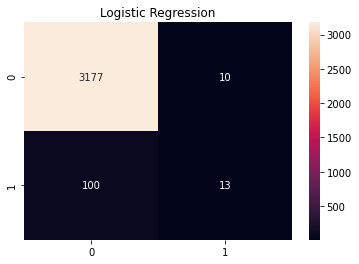

In [46]:
import seaborn as sb
import matplotlib.pyplot as plt

lr_conf = metrics.confusion_matrix(y_test, tts(X_train, X_test, y_train, linear_model.LogisticRegression))
sb.heatmap(lr_conf, annot=True,  fmt='')
title = "Logistic Regression"
plt.title(title)

Text(0.5, 1.0, 'Random Forest Classifier')

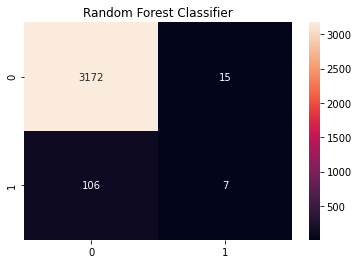

In [47]:
rfc_conf = metrics.confusion_matrix(y_test, tts(X_train, X_test, y_train, ensemble.RandomForestClassifier))
sb.heatmap(rfc_conf, annot=True,  fmt='')
title = "Random Forest Classifier"
plt.title(title)

Text(0.5, 1.0, 'Decision Trees')

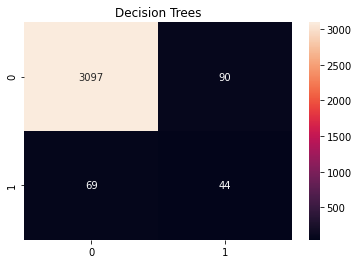

In [48]:
rfc_conf = metrics.confusion_matrix(y_test, tts(X_train, X_test, y_train, tree.DecisionTreeClassifier))
sb.heatmap(rfc_conf, annot=True,  fmt='')
title = "Decision Trees"
plt.title(title)

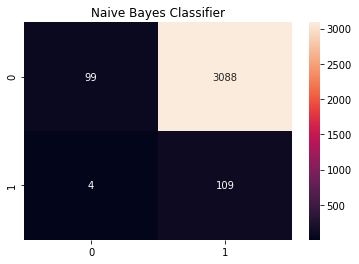

In [49]:
rfc_conf = metrics.confusion_matrix(y_test, tts(X_train, X_test, y_train, naive_bayes.GaussianNB))
sb.heatmap(rfc_conf, annot=True,  fmt='')
title = "Naive Bayes Classifier"
plt.title(title);

From the above accuracy scores and confusion matrix, the Logistic Regression model performs better

Feature Importance

<AxesSubplot:title={'center':'Random Forest Classifier'}>

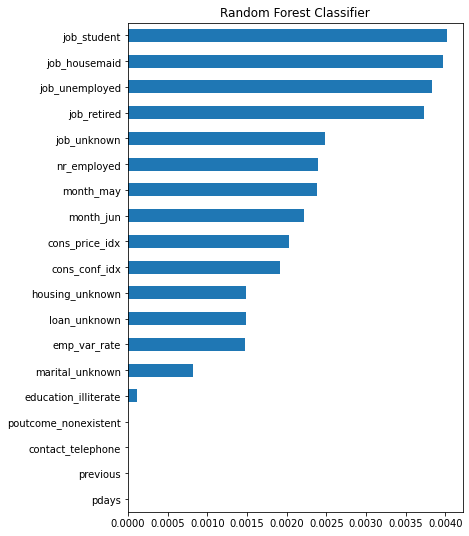

In [50]:
''' 
    rfc.feature_importances_ returns the feature importance
    pd.Series is a 1D labelled array
    ft_imp is a series having feature importance returned by model and labelled/indexed by the column names
'''
X = telset.drop(columns=['y'])
X = pd.get_dummies(X)

rfc = ensemble.RandomForestClassifier()
rfc.fit(X_scaled, y)
ft_imp = pd.Series(rfc.feature_importances_, index = X.columns)
ft_imp = ft_imp.nsmallest(19)
ft_imp.plot(kind='barh', figsize=(6,9), title="Random Forest Classifier")

<AxesSubplot:title={'center':'Decision Tree'}>

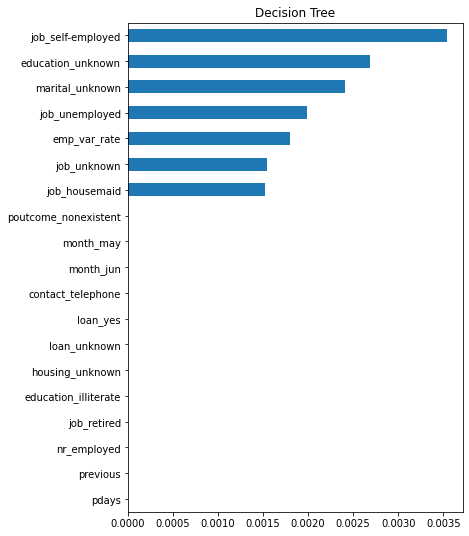

In [51]:
rfc = tree.DecisionTreeClassifier()
rfc.fit(X_scaled, y)
ft_imp = pd.Series(rfc.feature_importances_, index = X.columns)
ft_imp = ft_imp.nsmallest(19)
ft_imp.plot(kind='barh', figsize=(6,9), title="Decision Tree") 